In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.13.1


In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

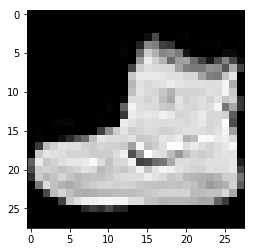

In [11]:
plt.figure()
plt.imshow(train_images[0],'gray')


In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

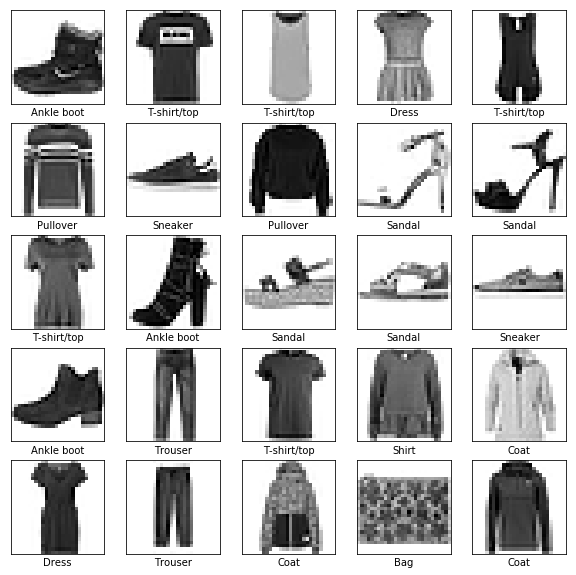

In [21]:
plt.figure(figsize = (10,10))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [22]:
# i h o
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128,activation=tf.nn.relu),
                         keras.layers.Dense(10,activation = tf.nn.softmax)])
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4062 - acc: 0.8579
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4020 - acc: 0.8580
Epoch 3/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.3977 - acc: 0.8600
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3937 - acc: 0.8611
Epoch 5/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3899 - acc: 0.8634


In [28]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

10000/10000 [==============================] - 0s 22us/sample - loss: 4.4469 - acc: 0.7179
0.7179


In [29]:
expR = model.predict(test_images)

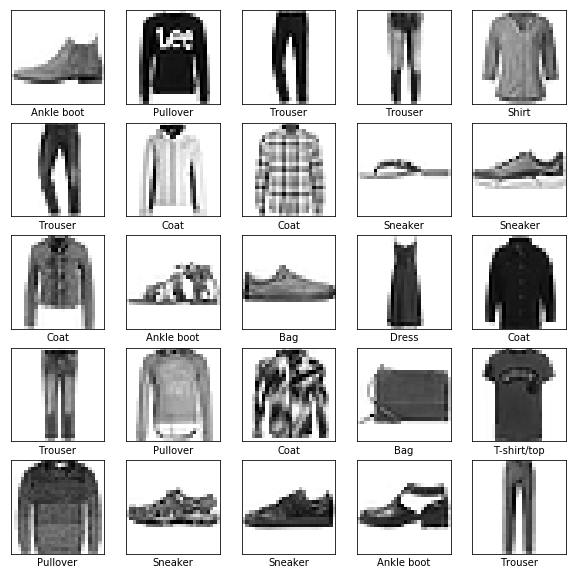

In [34]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[np.argmax(expR[i])])